In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%config InlineBackend.figure_format ='retina'

In [5]:
df = pd.read_csv('salary_data_cleaned.csv')

In [6]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,hq_same_state,company_age,python,matlab,cpp,sql,java,dsp,power,Embedded_System,ML,desc_len,Num_Competitors
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,3.665301,1807.766965,0.002561,0.012804,85.576697,107.380026,96.478361,0.385403,49.126761,0.142125,0.092190,0.120359,0.056338,0.046095,0.066581,0.495519,0.124200,0.020487,3998.476312,1.055058
std,0.949959,537.512325,0.050572,0.112500,27.848269,29.482501,28.005685,0.487002,41.309781,0.349403,0.289479,0.325589,0.230721,0.209825,0.249455,0.500300,0.330021,0.141748,1714.242751,1.337158
min,-1.000000,-1.000000,0.000000,0.000000,3.000000,20.000000,11.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000
25%,3.400000,1937.000000,0.000000,0.000000,68.000000,88.000000,77.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2847.000000,0.000000
50%,3.800000,1972.000000,0.000000,0.000000,84.000000,107.000000,95.500000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3785.000000,0.000000
75%,4.100000,1993.000000,0.000000,0.000000,104.000000,125.000000,113.000000,1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4962.000000,3.000000
max,5.000000,2020.000000,1.000000,1.000000,219.000000,219.000000,219.000000,1.000000,201.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16036.000000,4.000000


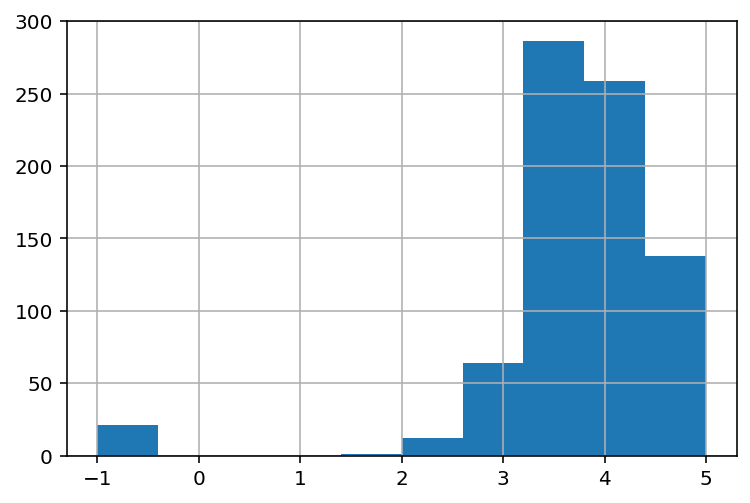

In [7]:
df.Rating.hist()

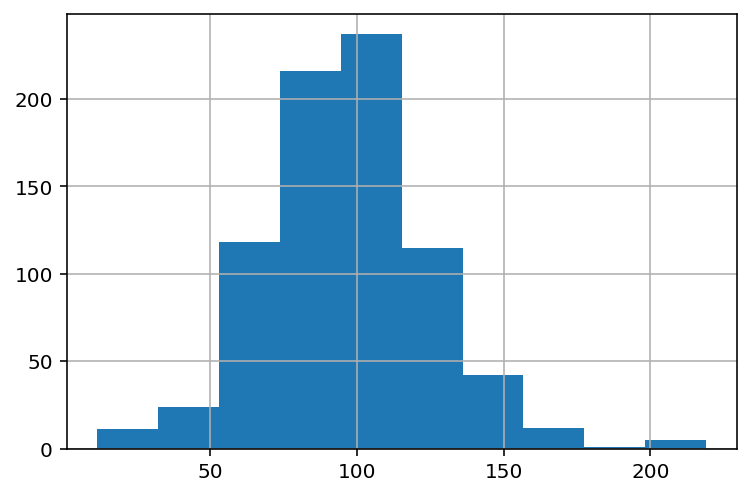

In [8]:
df.avg_salary.hist()

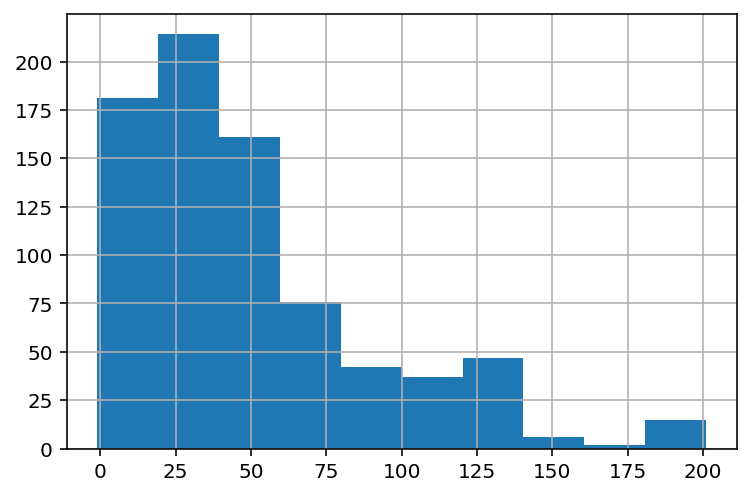

In [9]:
df.company_age.hist()

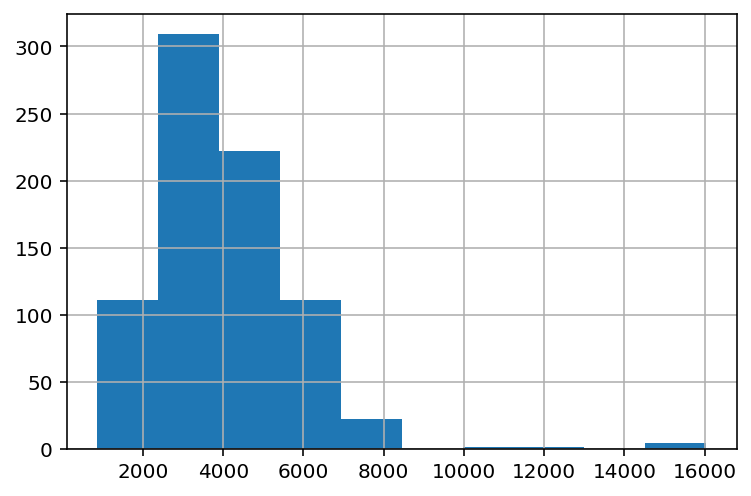

In [10]:
df.desc_len.hist()

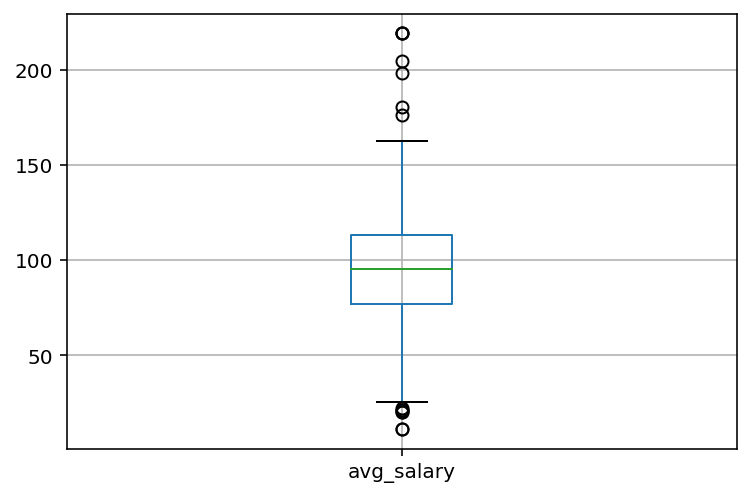

In [11]:
df.boxplot(column = ['avg_salary'])

In [12]:
df[ ['company_age', 'avg_salary', 'Rating', 'desc_len', 'Num_Competitors'] ].corr()

,company_age,avg_salary,Rating,desc_len,Num_Competitors
company_age,1.000000,-0.076461,0.056347,0.137320,0.245548
avg_salary,-0.076461,1.000000,0.135630,0.040125,0.132486
Rating,0.056347,0.135630,1.000000,0.053409,0.050860
desc_len,0.137320,0.040125,0.053409,1.000000,-0.019834
Num_Competitors,0.245548,0.132486,0.050860,-0.019834,1.000000


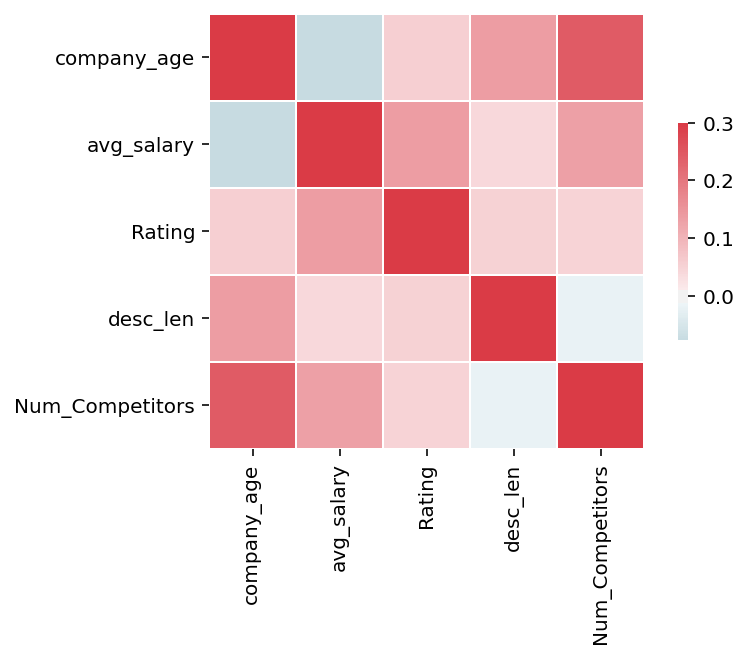

In [13]:
cmap = sns.diverging_palette(220,10, as_cmap =True)
sns.heatmap(df[['company_age', 'avg_salary', 'Rating', 'desc_len', 'Num_Competitors']].corr(), vmax = .3, center =0, cmap=cmap, 
               square = True, linewidths=0.5, cbar_kws={"shrink": .5} )

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'hq_same_state', 'company_age', 'python',
       'matlab', 'cpp', 'sql', 'java', 'dsp', 'power', 'Embedded_System', 'ML',
       'seniority', 'desc_len', 'Num_Competitors'],
      dtype='object')

graph for Size: total = 9


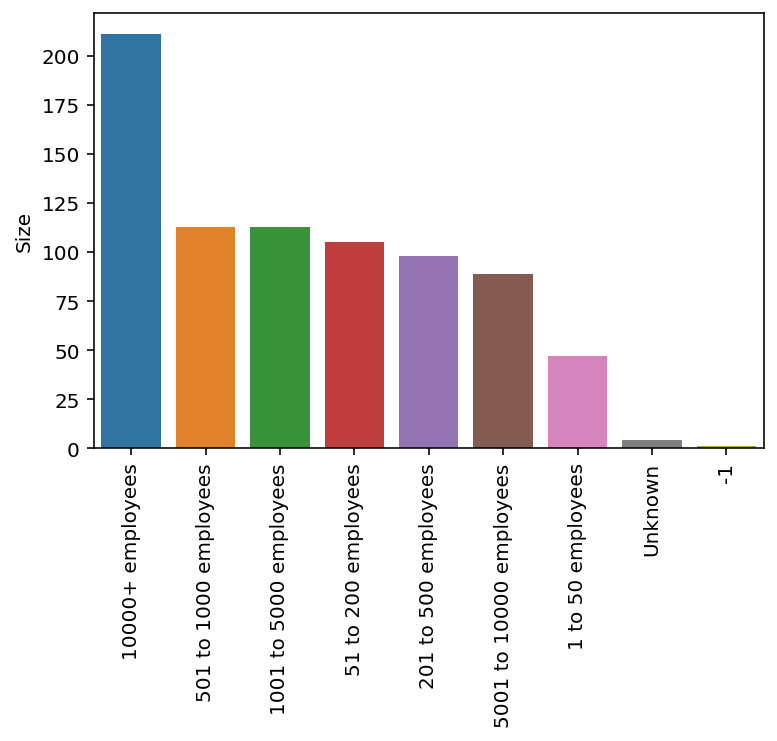

graph for Type of ownership: total = 10


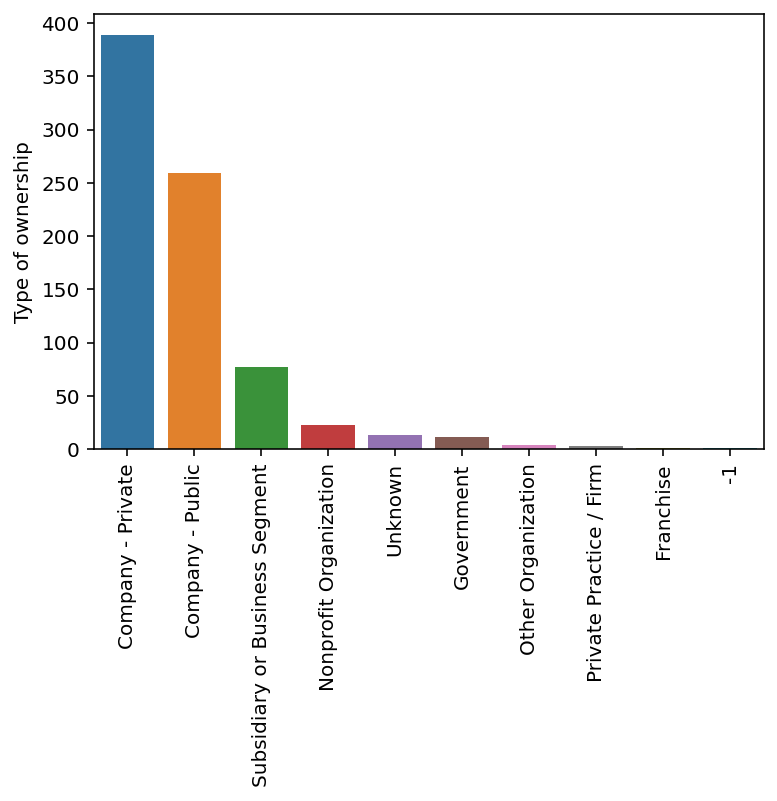

graph for Industry: total = 44


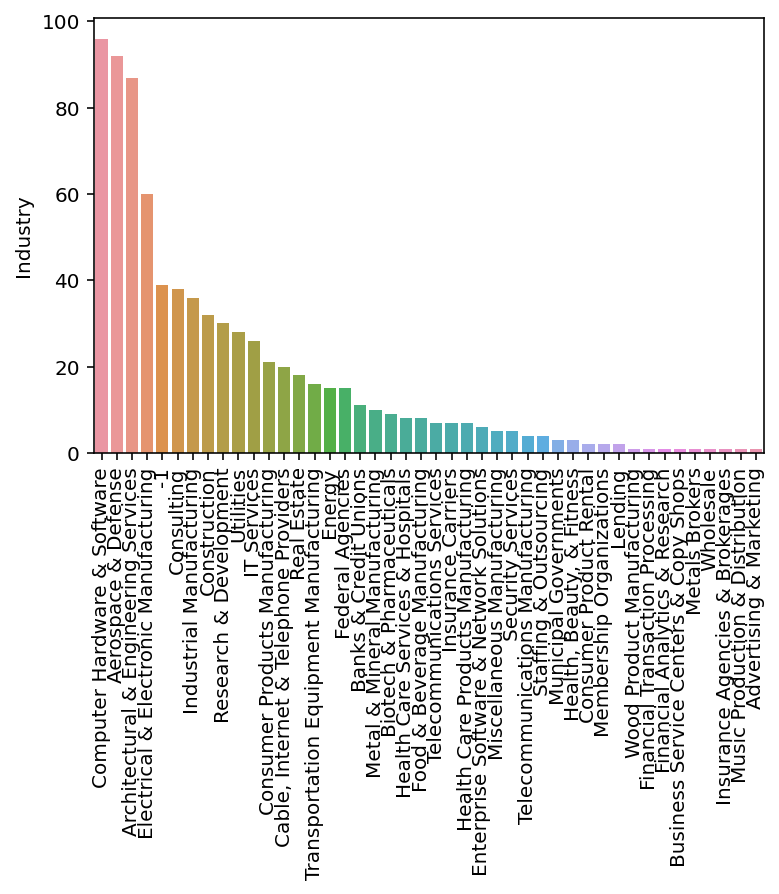

graph for Sector: total = 17


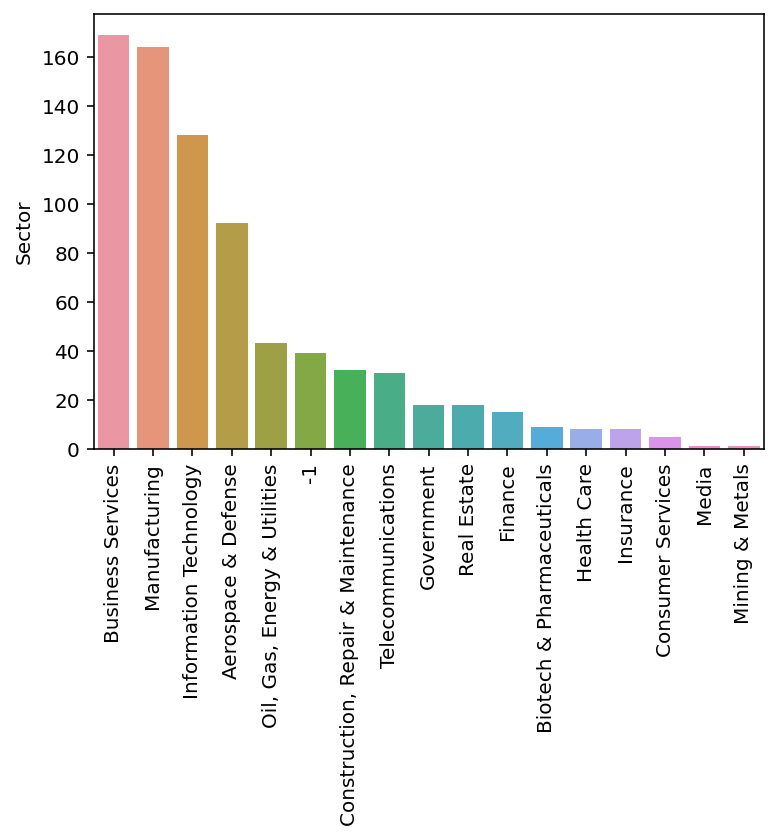

graph for Revenue: total = 14


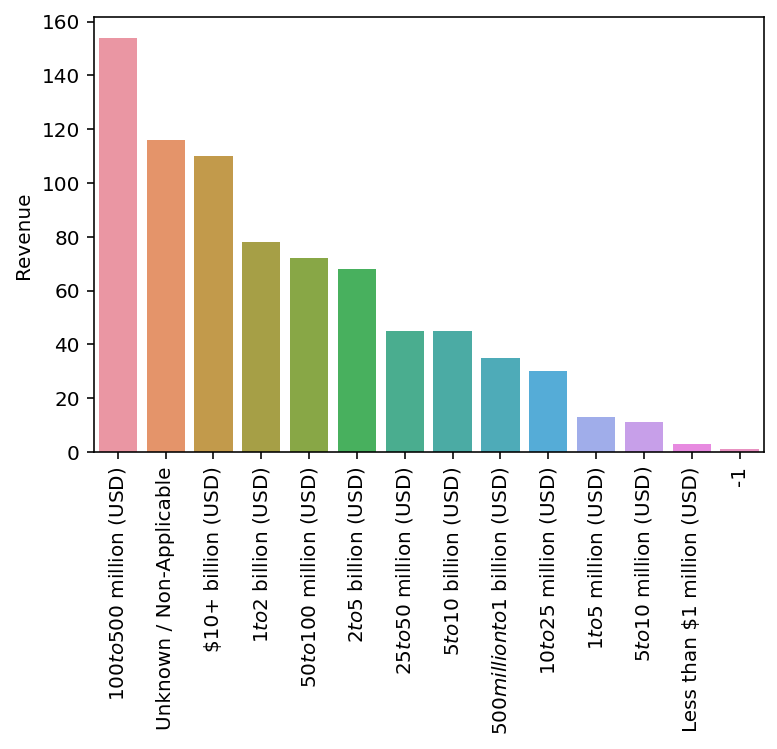

graph for job_state: total = 44


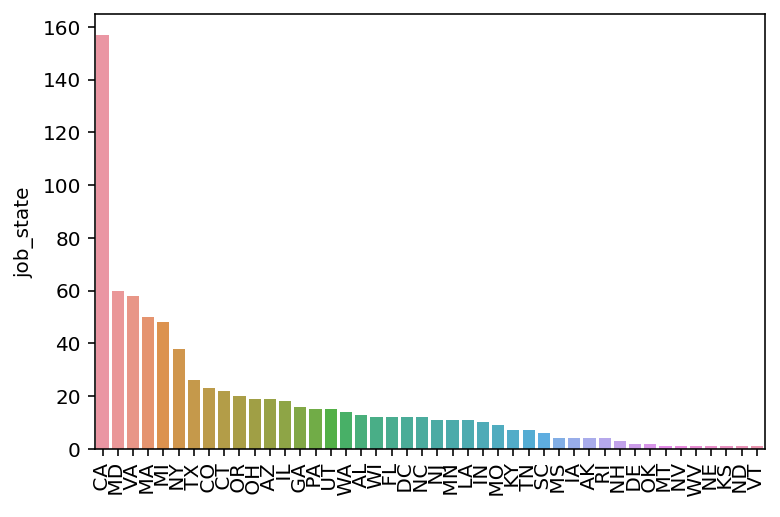

graph for hq_same_state: total = 2


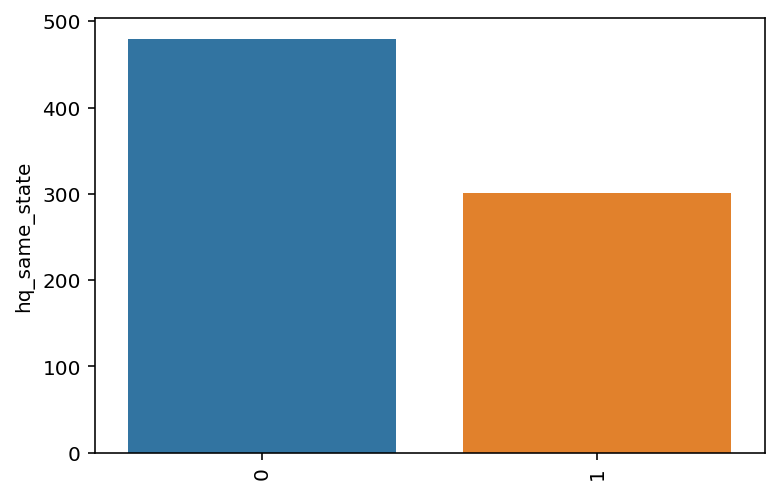

In [15]:
df_cat = df[[ 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'hq_same_state']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for python: total = 2


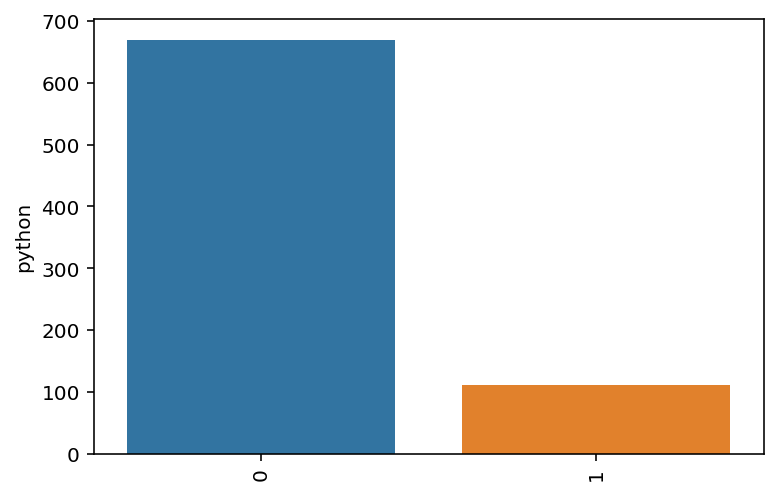

graph for matlab: total = 2


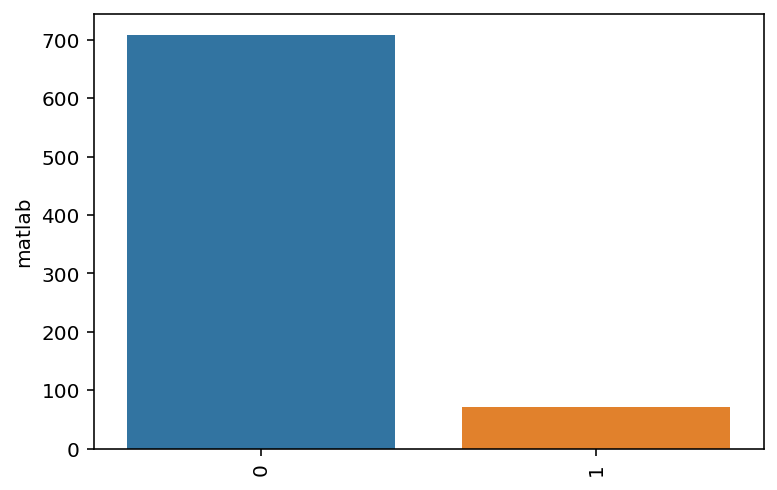

graph for cpp: total = 2


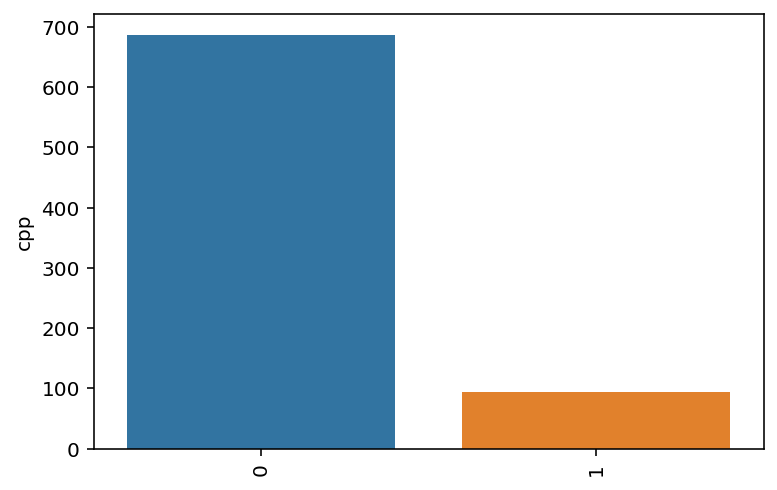

graph for dsp: total = 2


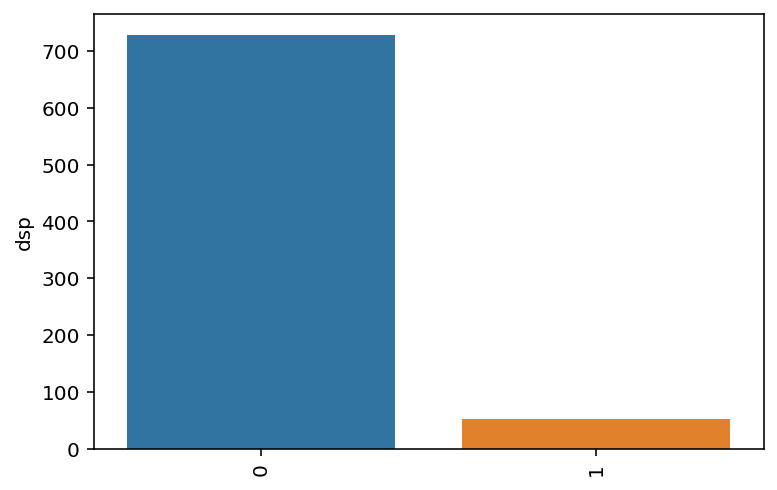

graph for power: total = 2


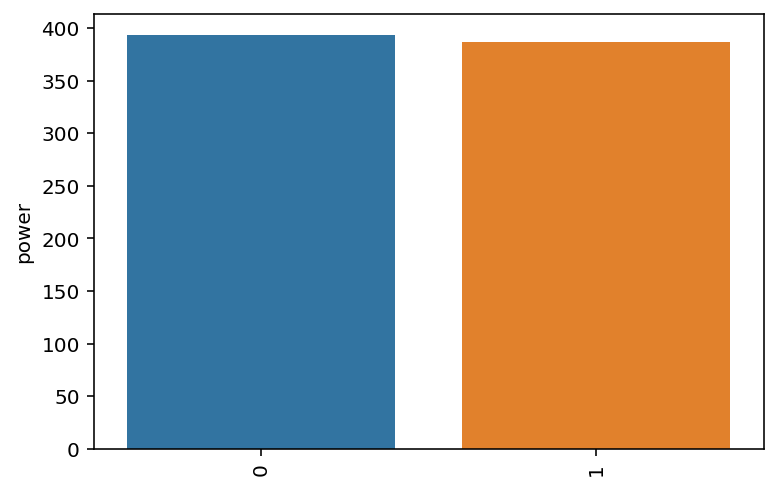

graph for Embedded_System: total = 2


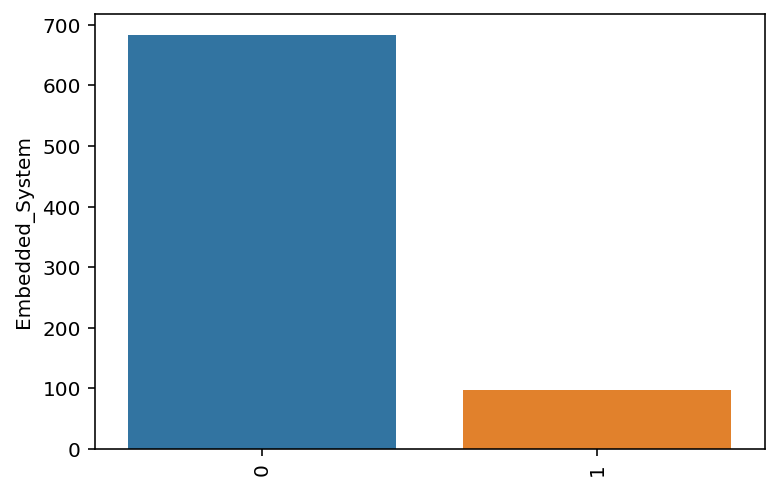

graph for ML: total = 2


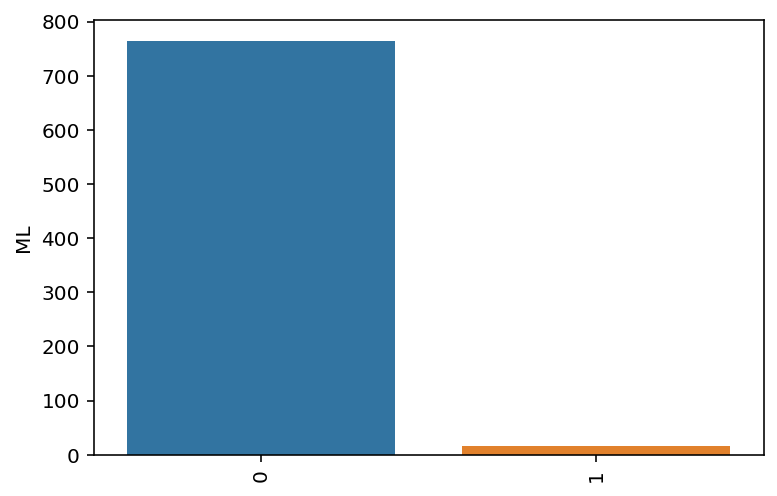

In [16]:
df_cat = df[[ 'python','matlab', 'cpp', 'dsp', 'power', 'Embedded_System', 'ML',]]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


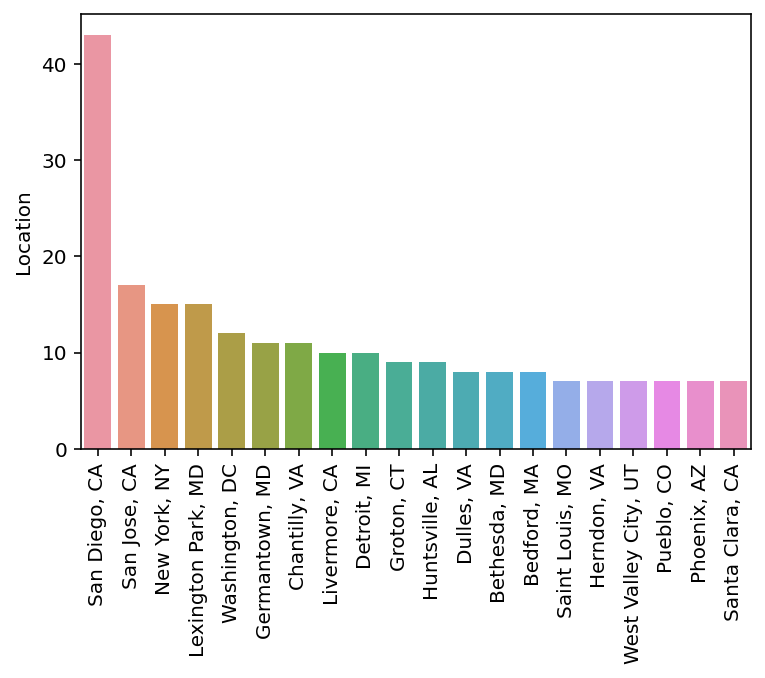

graph for Headquarters: total = 20


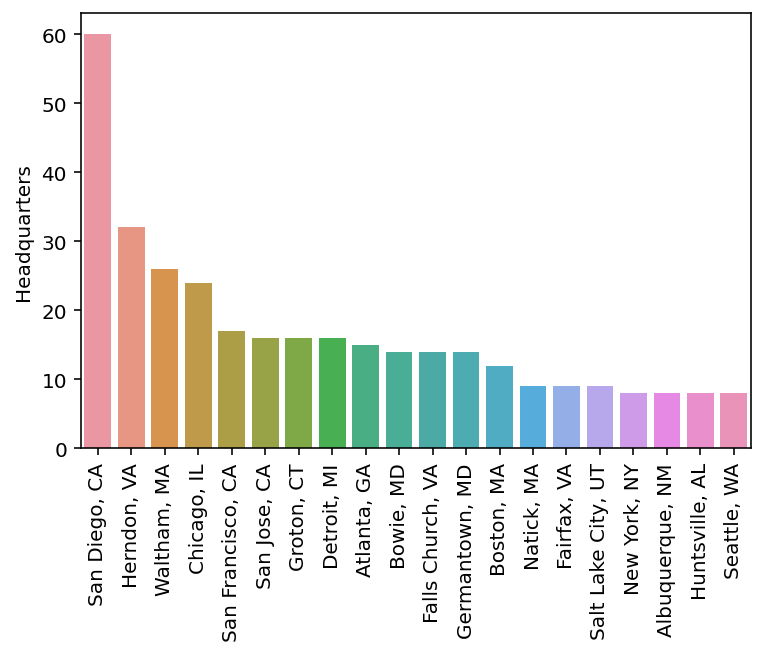

graph for company_txt: total = 20


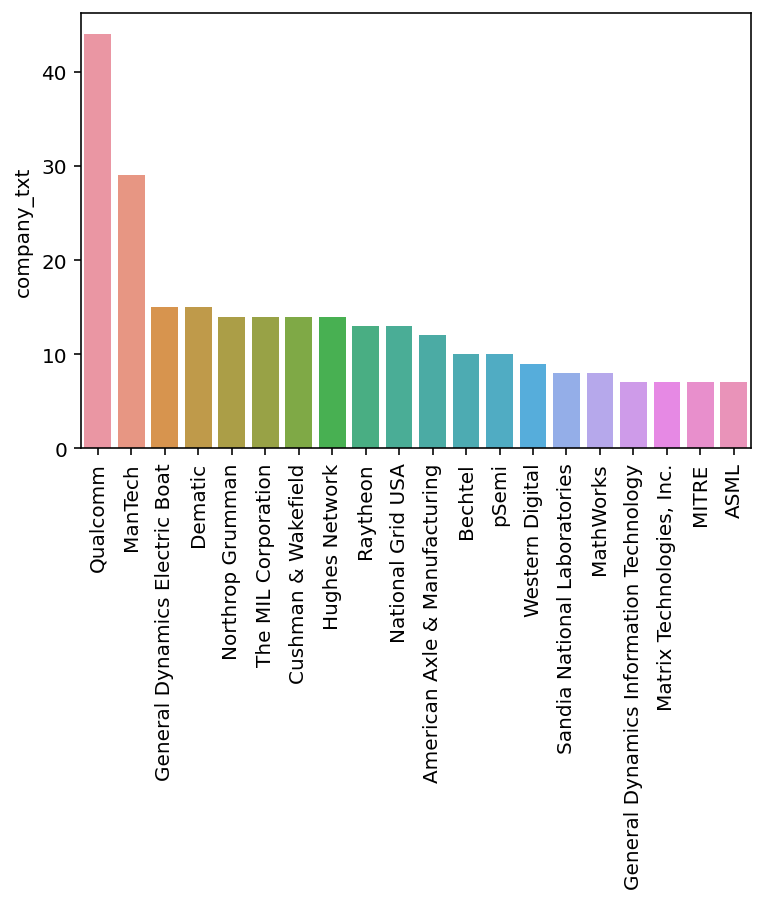

In [17]:
df_cat = df[['Location', 'Headquarters','company_txt']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [18]:
df.seniority.value_counts()

na        486
senior    278
junior     10
entry       7
Name: seniority, dtype: int64

In [22]:
pd.pivot_table(df, index =['seniority'], values ='avg_salary')

,avg_salary
seniority,
entry,74.642857
junior,92.350000
na,88.979630
senior,110.285971


In [24]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [25]:
df_pivots = df [[ 'job_state', 'Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
                 'python','matlab', 'cpp', 'dsp', 'power', 'Embedded_System', 'ML',
                 'Num_Competitors', 'avg_salary'  ]]

In [26]:
for i in df_pivots.columns[:-1]:
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    print('')
    print('')
    print('')

           avg_salary
job_state            
 MD        114.691667
 CA        113.819108
 DC        112.416667
 VA        104.818966
 NH        104.500000
 IL        103.138889
 LA         98.681818
 ND         98.500000
 RI         98.125000
 CO         96.673913
 MN         96.090909
 MA         95.810000
 WA         95.714286
 OR         94.900000
 OK         93.500000
 AK         93.125000
 TX         91.480769
 OH         91.368421
 AL         90.538462
 NY         90.039474
 MO         89.555556
 MI         88.479167
 FL         87.791667
 NV         87.500000
 DE         86.750000
 AZ         85.473684
 PA         82.900000
 WV         81.500000
 UT         81.400000
 IA         81.375000
 NJ         80.500000
 CT         80.045455
 SC         79.666667
 WI         77.833333
 MS         76.250000
 MT         74.000000
 IN         71.750000
 KS         70.000000
 NE         66.500000
 NC         66.375000
 GA         65.625000
 VT         62.000000
 TN         61.071429
 KY       

In [27]:
pd.pivot_table(df_pivots, index = 'Revenue', columns ='python', values ='avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),58.0,20.0
$1 to $5 million (USD),13.0,NaN
$10 to $25 million (USD),25.0,5.0
$10+ billion (USD),71.0,39.0
$100 to $500 million (USD),141.0,13.0
$2 to $5 billion (USD),55.0,13.0
$25 to $50 million (USD),40.0,5.0
$5 to $10 billion (USD),39.0,6.0
$5 to $10 million (USD),10.0,1.0


In [28]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

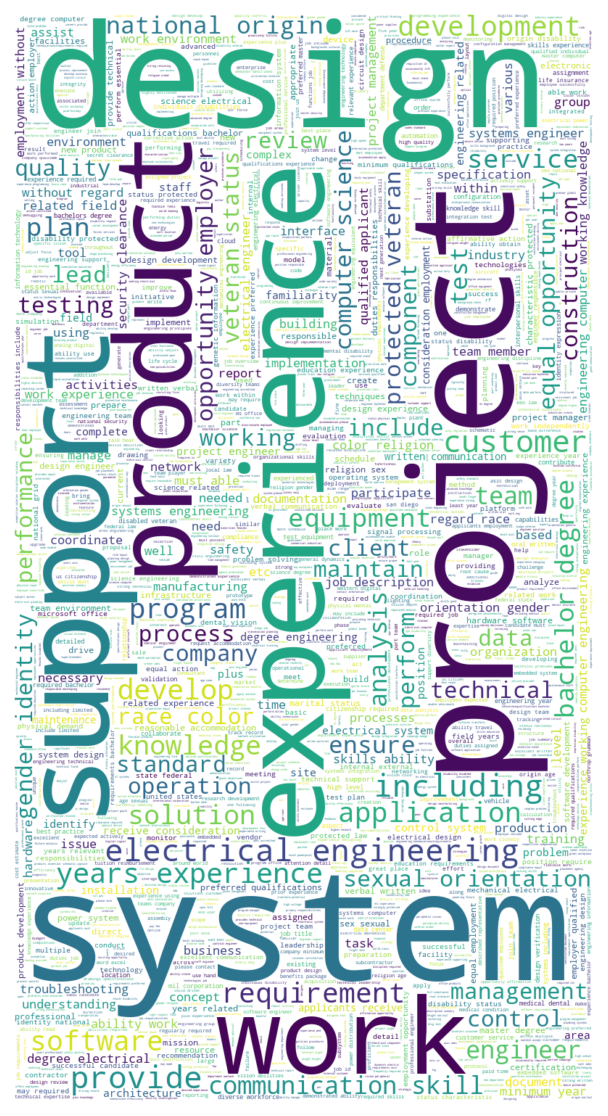

In [30]:

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()